In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data 
y = iris.target

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# 랜덤성을 부여하지 않고 자르기 : shuffle 수행하지 않음

In [4]:
test_size = 50
# X[0][0] => 대괄호 하나는 차원을 줄여준다, numpy 에서는 X[0, 0] 지원 (axis = 0, axis = 1)
X_test = X[:test_size] # 2d 배열 x 의 0 axis 를 사용
y_test = y[:test_size] # x 가 잘린 크기와 똑같아야 한다.

print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [5]:
X_train = X[test_size:]
y_train = y[test_size:]

print(y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
  
dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)

acc_result = accuracy_score(y_test, pred)

print("예측 스코어 : {:.4f}".format(acc_result))

# 1, 2번으로 훈련을 하고 0으로 test 를 하니 점수가 0이 나올 수 밖에 없다.
# 그러므로 섞어서 자르는 것이 필수

예측 스코어 : 0.0000


In [7]:
# train_test_split 활용하기

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, # feature, target
    test_size=0.3,
    random_state=121
)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

<Axes: ylabel='count'>

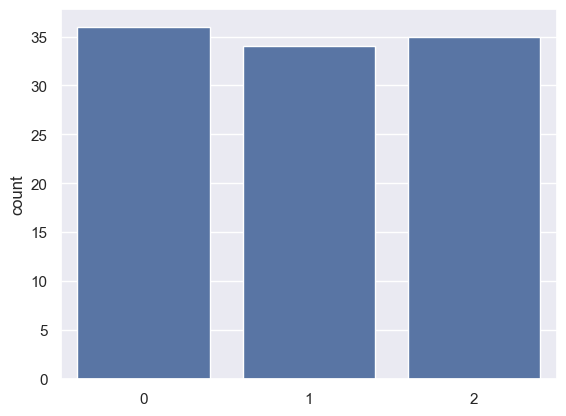

In [10]:
# y 의 분포 시각화
sns.countplot(x = y_train)

In [11]:
# 1:1:1 로 맞춰주기 위해서 stratify 옵션 활용 (계층적 분할)

<Axes: ylabel='count'>

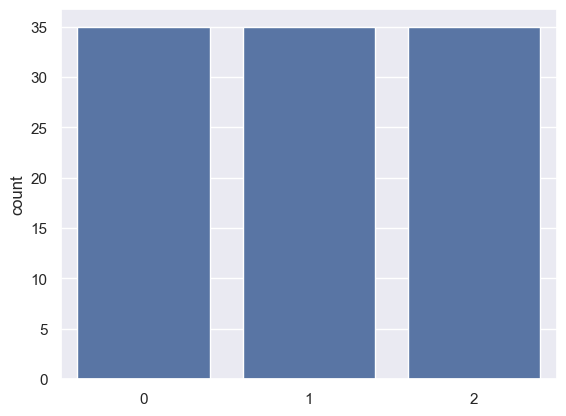

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, # feature, target
    test_size=0.3,
    random_state=121,
    stratify=y # 정수 또는 문자열 데이터에만 사용할 수 있다.
    # 연속형 데이터를 다를 때는 계층을 직접 만들어준다
    # label 의 갯수가 unbalance 할 떄 고려
)

sns.set_theme()
sns.countplot(x = y_train)

In [13]:
# K-fold 
from sklearn.model_selection import KFold
import numpy as np

In [14]:
# K-Fold
from sklearn.model_selection import KFold
import numpy as np

# 3개의 폴드 세트로 분리하는 KFold 객체 생성
kfold = KFold(n_splits=3)

# KFold 객체의 split() 함수를 호출하면 폴드 별 학습용, 검증용 테스트의 인덱스를 array로 반환
for train_indices, valid_indices in kfold.split(X):
  print("검증 세트의 인덱스 : {}".format(valid_indices))
  print("훈련 세트의 인덱스 : {}".format(train_indices))
  print()

검증 세트의 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
훈련 세트의 인덱스 : [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]

검증 세트의 인덱스 : [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
훈련 세트의 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 

In [15]:
n_iter = 0
cv_accuracy = [] # 각 폴드에서의 정확도를 담을 배열

kfold = KFold(n_splits=3)

for train_indices, valid_indices in kfold.split(X):

  # 반환된 인덱스를 이용해 학습용, 검증용 데이터를 추출
  X_train, X_valid = X[train_indices], X[valid_indices]
  y_train, y_valid = y[train_indices], y[valid_indices]

  # 모델 생성 및 훈련
  dt_clf = DecisionTreeClassifier().fit(X_train, y_train) # 모델 객체 생성과 동시에 훈련

  # 예측
  pred = dt_clf.predict(X_valid)

  # 평가
  acc = accuracy_score(y_valid, pred)

  # 해당 폴드의 평가 결과를 배열에 저장
  cv_accuracy.append(acc)

  n_iter += 1
  print("{} 번째 폴드에 대한 평가 결과 : {:.4f}".format(n_iter, acc))

print()
print("최종 결과 : {}".format(np.mean(cv_accuracy)))

# 각 검증을 0, 1, 2 target 으로만 해서 정확도가 0이 나온다.
# 그러므로 분류에서는 stratified k fold 사용

1 번째 폴드에 대한 평가 결과 : 0.0000
2 번째 폴드에 대한 평가 결과 : 0.0000
3 번째 폴드에 대한 평가 결과 : 0.0000

최종 결과 : 0.0


In [16]:
# Stratified K Fold
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=3)

for train_indices, valid_indices in skfold.split(X, y):
  print("검증 세트의 인덱스 : {}".format(valid_indices))
  print()

  class_, counts = np.unique(y[valid_indices], return_counts=True)
  classes = dict(zip(class_, counts))
  print("클래스 0 : {}개 / 클래스 1 : {}개 / 클래스 2 : {}개".format(classes[0], classes[1], classes[2]))
  print("="*50)
  print()

검증 세트의 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

클래스 0 : 17개 / 클래스 1 : 17개 / 클래스 2 : 16개

검증 세트의 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

클래스 0 : 17개 / 클래스 1 : 16개 / 클래스 2 : 17개

검증 세트의 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

클래스 0 : 16개 / 클래스 1 : 17개 / 클래스 2 : 17개



In [17]:
n_iter = 0
cv_accuracy = [] # 각 폴드에서의 정확도를 담을 배열

skfold = StratifiedKFold(n_splits=3)

for train_indices, valid_indices in skfold.split(X, y):

  # 반환된 인덱스를 이용해 학습용, 검증용 데이터를 추출
  X_train, X_valid = X[train_indices], X[valid_indices]
  y_train, y_valid = y[train_indices], y[valid_indices]

  # 모델 생성 및 훈련
  dt_clf = DecisionTreeClassifier().fit(X_train, y_train) # 모델 객체 생성과 동시에 훈련

  # 예측
  pred = dt_clf.predict(X_valid)

  # 평가
  acc = accuracy_score(y_valid, pred)

  # 해당 폴드의 평가 결과를 배열에 저장
  cv_accuracy.append(acc)

  n_iter += 1
  print("{} 번째 폴드에 대한 평가 결과 : {:.4f}".format(n_iter, acc))

print()
print("최종 결과 : {}".format(np.mean(cv_accuracy)))

1 번째 폴드에 대한 평가 결과 : 0.9800
2 번째 폴드에 대한 평가 결과 : 0.9400
3 번째 폴드에 대한 평가 결과 : 0.9800

최종 결과 : 0.9666666666666667


In [18]:
#cross_val_score

In [19]:
from sklearn.model_selection import cross_val_score

# cv의 수 만큼 결과 도출 => 배열 형태로 반환
scores = cross_val_score(
    DecisionTreeClassifier(), #Classifier 가 들어가 있으면 자동으로 stratified k fold 사용
    X,
    y,
    scoring='accuracy', #성능 측정 방식 (metric)
    cv=3 # fold 갯수
)

print("폴드 별 정확도 확인 : {}".format(scores))
print("평균 정확도 확인 : {}".format(np.mean(scores)))

폴드 별 정확도 확인 : [0.98 0.92 1.  ]
평균 정확도 확인 : 0.9666666666666667


In [20]:
# GridSearch CV

In [21]:
# 모델이 사용할 하이퍼 파라미터 딕셔너리

parameters = {
    'max_depth' : [1,2,3],
    'min_samples_split' : [2,3],
}

In [22]:
from sklearn.model_selection import GridSearchCV

grid_dt_clf = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=parameters,
    return_train_score=True,
    cv=3, # 각 하이퍼파라미터 조합으로 만드는 모델에서 사용할 fold 갯수 => 3개의 fold 로 6개 조합을 검증
    n_jobs=-1 # 사용 가능한 CPU 코어 갯수 지정, -1이면 모든 CPU 사용
)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    stratify=y,
    random_state=121
)

In [24]:
grid_dt_clf.fit(X_train, y_train)
# GridSearch 결과는 cv_results_ 변수에 들어있다. => 뒤에 _ 가 붙는 것은 class 의 속성이라는 의미
import pandas as pd
pd.DataFrame(grid_dt_clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.000997,5.150430e-07,0.001329,4.697969e-04,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.650,0.675,0.65,0.658333,0.011785,5,0.6750,0.6625,0.6750,0.670833,0.005893
1,0.000996,2.247832e-07,0.000997,4.495664e-07,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.650,0.675,0.65,0.658333,0.011785,5,0.6750,0.6625,0.6750,0.670833,0.005893
2,0.000997,3.371748e-07,0.001329,4.697972e-04,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.975,0.950,0.85,0.925000,0.054006,3,0.9500,0.9625,0.9875,0.966667,0.015590
3,0.000997,1.123916e-07,0.000665,4.699099e-04,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.975,0.950,0.85,0.925000,0.054006,3,0.9500,0.9625,0.9875,0.966667,0.015590
4,0.001329,4.703026e-04,0.000664,4.695721e-04,3,2,"{'max_depth': 3, 'min_samples_split': 2}",1.000,0.950,0.85,0.933333,0.062361,1,0.9625,0.9875,0.9875,0.979167,0.011785
5,0.000664,4.695721e-04,0.000998,2.135440e-06,3,3,"{'max_depth': 3, 'min_samples_split': 3}",1.000,0.950,0.85,0.933333,0.062361,1,0.9625,0.9875,0.9875,0.979167,0.011785


In [25]:
print("GridSearchCV 최적 하이퍼 파라미터 : {}".format(grid_dt_clf.best_params_))
print("GridSearchCV 최고 정확도 : {:.4f}".format(grid_dt_clf.best_score_)) # valid 세트에서의 최고 정확도

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.9333


In [26]:
# 최고의 결과를 냈었던 추정기(Estimator)로 예측
pred = grid_dt_clf.predict(X_test)

print("테스트 세트의 정확도 : {:.4f}".format(accuracy_score(y_test, pred)))

테스트 세트의 정확도 : 0.9667


In [27]:
# 학습이 완료된 최고 성능의 모델 객체 얻어내기
best_dt_clf = grid_dt_clf.best_estimator_
best_dt_clf

DecisionTreeClassifier(max_depth=3)

In [29]:
pred = best_dt_clf.predict(X_test)
pred

array([0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1,
       2, 0, 1, 2, 2, 1, 1, 0])